# Figure 5

- Panel A: NF1 titration curve
- Panel B: Plot of pairwise aggregated profiles
- Panel C: Box plot w/points overlaid of the predicted class probabilities for siRNAs

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(arrow))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(ggridges))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”
Warning message:
“package ‘arrow’ was built under R version 4.2.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.3”
Warning message:
“package ‘ggridges’ was built under R version 4.2.3”


## Set paths and constants

In [2]:
figure_dir <- "../figures"
output_main_figure_5 <- file.path(
    figure_dir, "main_figure_5_plate4_siRNA_eval.png"
)

figure_theme <- theme(
    legend.spacing.y = unit(0.1, "cm"),
    legend.box.spacing = unit(0.5, "cm"),
    legend.key.size = unit(1, "lines"),
    legend.key.width = unit(1, "lines"),
    legend.title = element_text(size = 16), 
    legend.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    strip.background = element_rect(
        colour = "black",
        fill = "#fdfff4"
    ),
    strip.text = element_text(size = 16)
)

## Panel A

In [3]:
titration_path <- file.path("./nf1_titration_curve.csv")

nf1_titration_df <- read.csv(titration_path)

nf1_titration_df <- nf1_titration_df %>%
  mutate(
    Group = ifelse(grepl("^Scramble", Construct), "Scramble", "NF1"),
    LineType = ifelse(grepl("Average", Construct), "Average", "Replicate")
  )

# Convert LineType to a factor
nf1_titration_df$LineType <- factor(nf1_titration_df$LineType, levels = c("Replicate", "Average"))

dim(nf1_titration_df)
head(nf1_titration_df)

[1] 80  5

,siRNA_Concentration,Percent_NF1_vs_Scramble,Construct,Group,LineType
,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,1e+01,100,Scramble_Average,Scramble,Average
2,1e+00,100,Scramble_Average,Scramble,Average
3,1e-01,100,Scramble_Average,Scramble,Average
4,1e-02,100,Scramble_Average,Scramble,Average
5,1e-03,100,Scramble_Average,Scramble,Average
6,1e-04,100,Scramble_Average,Scramble,Average


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


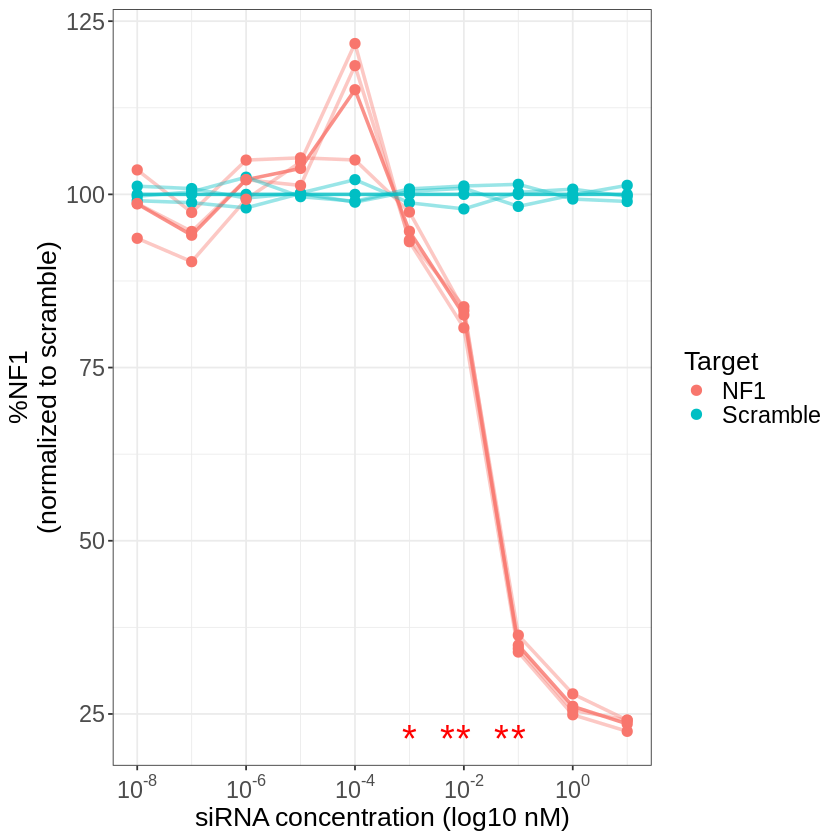

In [4]:
# Create the plot
titration_plot <- ggplot(nf1_titration_df, aes(x = siRNA_Concentration, y = Percent_NF1_vs_Scramble, color = Group)) +
  geom_line(aes(group = Construct, alpha = LineType), size = 1, show.legend = FALSE) +
  geom_point(aes(group = Construct), size = 2.5) +
  scale_x_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
  ) +
  theme_bw() +
  scale_alpha_manual(values = c("Average" = 0.8, "Replicate" = 0.4)) +
  labs(
    x = "siRNA concentration (log10 nM)",
    y = "%NF1\n(normalized to scramble)",
    color = "Target"
  ) +
  figure_theme +
  annotate("text", x = c(0.001, 0.005, 0.01, 0.05, 0.1), y = -Inf, label = "*", vjust = -0.5, color = "red", size = 8) # Add asterisks

titration_plot


## Panel B

In [5]:
# Set seed to maintain random point jittering (geom_jitter)
set.seed(1234)

In [6]:
# Set plot defaults
construct_labels <- c(
    "NF1 Construct 1" = "NF1 Target 1 replicates",
    "NF1 Construct 1 Scramble" = "NF1 Target 1 vs. scramble",
    "NF1 Construct 1 No treatment" = "NF1 Target 1 vs. no treatment",
    "Scramble comparison" = "Scramble",
    "No treatment comparison" = "No treatment",
    "Scramble No treatment" = "Scramble vs. No treatment"
)

construct_colors <- c(
    "Replicate" = "#1f78b4",
    "Scramble" = "#a6cee3",
    "No treatment" = "pink",
    "Scramble vs.\nscramble" = "lightgrey",
    "No treatment vs.\nno treatment" = "white",
    "Scramble vs.\nno treatment" = "lightyellow"
)

In [7]:
plate_4_correlations_path <- file.path(
    "..",
    "..",
    "0.data_analysis",
    "construct_phenotypic_expression_plate_4_fs_data",
    "median_correlation_relationships",
    "post_fs_aggregation_correlations",
    "construct_correlation_data",
    "plate_4_well_correlations.parquet"
)


platemap_dir <- file.path(
    "..",
    "..",
    "..",
    "nf1_cellpainting_data",
    "0.download_data",
    "metadata"
)

platemap_file <- file.path(platemap_dir, "platemap_NF1_plate4.csv")

correlation_df <- read_parquet(plate_4_correlations_path)

# Fill NA values in Metadata_Concentration column with 0
correlation_df <- correlation_df %>%
  mutate(Metadata_Concentration = ifelse(is.na(Metadata_Concentration), 0, Metadata_Concentration))

dim(correlation_df)
head(correlation_df)

[1] 630   8

correlation,Metadata_Well__group0,Metadata_Well__group1,Metadata_siRNA__group0,Metadata_genotype__group0,Metadata_siRNA__group1,Metadata_genotype__group1,Metadata_Concentration
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
0.5570052,B2,B3,No Construct,WT,Scramble,WT,0.050
0.5273900,B2,B4,No Construct,WT,Scramble,WT,0.005
0.2589570,B2,B5,No Construct,WT,No Construct,WT,0.000
0.1097614,B2,B6,No Construct,WT,Scramble,WT,0.005
0.4284636,B2,B7,No Construct,WT,Scramble,WT,0.050
0.5495607,B2,B8,No Construct,WT,No Construct,WT,0.000


In [8]:
# # Remove 0 concentration for now until figure out how to add it nicely to figure
# correlation_df <- correlation_df %>%
#   filter(Metadata_Concentration != 0)

# Perform additional mutations
correlation_df <- correlation_df %>%
  mutate(
    construct_comparison = paste(Metadata_siRNA__group0, Metadata_siRNA__group1, sep = "__"),
    construct_y_group = Metadata_siRNA__group0,
    construct_colors = construct_comparison
  )

# Include 0 dose in the levels of Metadata_Concentration
correlation_df$Metadata_Concentration <- factor(
    correlation_df$Metadata_Concentration,
    levels = c("0.001", "0.005", "0.01", "0.05", "0.1")
)

correlation_df$construct_comparison <- dplyr::recode(
    correlation_df$construct_comparison,
    "NF1 Target 1__NF1 Target 1" = "NF1 Construct 1",
    "NF1 Target 1__No Construct" = "NF1 Construct 1 No treatment",
    "NF1 Target 1__Scramble" = "NF1 Construct 1 Scramble",
    "Scramble__Scramble" = "Scramble comparison",
    "No Construct__No Construct" = "No treatment comparison",
    "No Construct__Scramble" = "Scramble No treatment"
)

correlation_df[correlation_df$construct_comparison == "Scramble comparison", "construct_y_group"] = "Other control"
correlation_df[correlation_df$construct_comparison == "No treatment comparison", "construct_y_group"] = "Other control"
correlation_df[correlation_df$construct_comparison == "Scramble No treatment", "construct_y_group"] = "Other control"

correlation_df[correlation_df$construct_comparison == "NF1 Construct 1", "construct_colors"] = "Replicate"
correlation_df[correlation_df$construct_comparison == "NF1 Construct 1 Scramble", "construct_colors"] = "Scramble"
correlation_df[correlation_df$construct_comparison == "NF1 Construct 1 No treatment", "construct_colors"] = "No treatment"

correlation_df[correlation_df$construct_comparison == "Scramble comparison", "construct_colors"] = "Scramble vs.\nscramble"
correlation_df[correlation_df$construct_comparison == "No treatment comparison", "construct_colors"] = "No treatment vs.\nno treatment"
correlation_df[correlation_df$construct_comparison == "Scramble No treatment", "construct_colors"] = "Scramble vs.\nno treatment"

correlation_df$construct_colors <- factor(
    correlation_df$construct_colors,
    levels = c(
        "Replicate",
        "Scramble",
        "No treatment",
        "Scramble vs.\nscramble",
        "No treatment vs.\nno treatment",
        "Scramble vs.\nno treatment"
    )
)

# Remove all wells that contain Null genotype cells
platemap_df <- readr::read_csv(platemap_file, show_col_types = FALSE)

null_wells <- platemap_df %>%
    dplyr::filter(genotype == "Null") %>%
    dplyr::pull(well_position)

correlation_df <- correlation_df %>%
    dplyr::filter(!(Metadata_Well__group0 %in% !!null_wells)) %>%
    dplyr::filter(!(Metadata_Well__group1 %in% !!null_wells))

print(dim(correlation_df))
head(correlation_df, 3)

[1] 306  11


correlation,Metadata_Well__group0,Metadata_Well__group1,Metadata_siRNA__group0,Metadata_genotype__group0,Metadata_siRNA__group1,Metadata_genotype__group1,Metadata_Concentration,construct_comparison,construct_y_group,construct_colors
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<fct>
0.5570052,B2,B3,No Construct,WT,Scramble,WT,0.05,Scramble No treatment,Other control,Scramble vs. no treatment
0.5273900,B2,B4,No Construct,WT,Scramble,WT,0.005,Scramble No treatment,Other control,Scramble vs. no treatment
0.2589570,B2,B5,No Construct,WT,No Construct,WT,NA,No treatment comparison,Other control,No treatment vs. no treatment


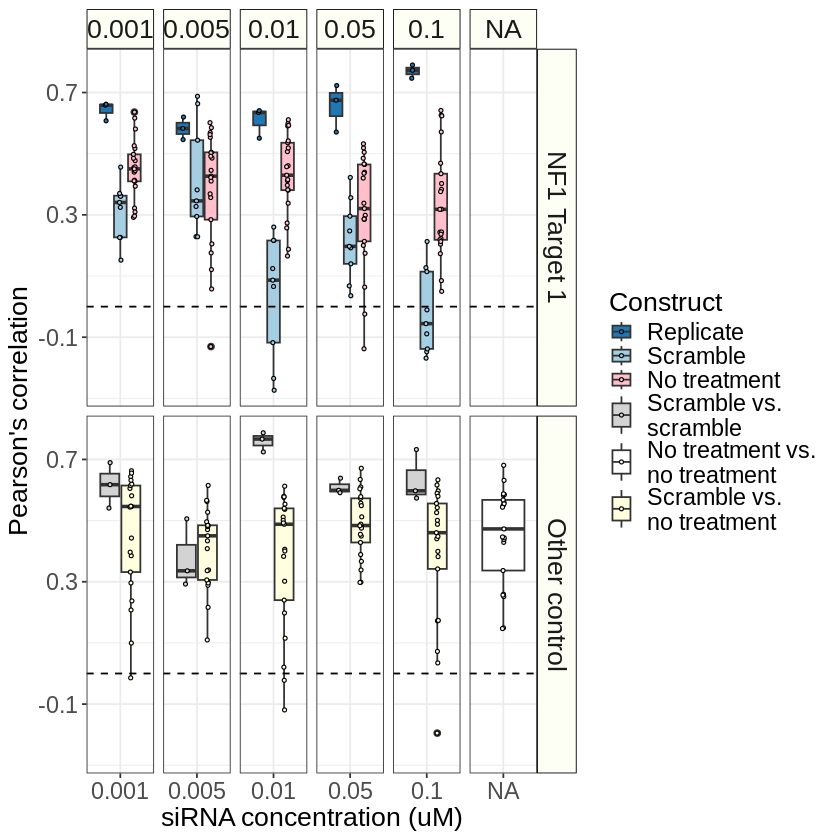

In [9]:
nf1_dose_construct_gg <- (
    ggplot(correlation_df,
           aes(
               x = Metadata_Concentration,
               y = correlation,
               fill = construct_colors
           )
          )
    + geom_boxplot()
    + geom_hline(yintercept = 0, linetype = "dashed")
    + geom_jitter(
        aes(color = construct_colors),
        position = position_jitterdodge(
            jitter.width = 0.15,
            dodge.width = 0.75
        ),
        shape = 21,
        size = 0.8,
        color = "black"
    )
    + facet_grid("construct_y_group~Metadata_Concentration", scales = "free_x")
    + labs(
        x = "siRNA concentration (uM)",
        y = "Pearson's correlation"
    )
    + scale_color_manual(
        name = "Construct",
        labels = construct_labels,
        values = construct_colors
    )
    + scale_fill_manual(
        name = "Construct",
        labels = construct_labels,
        values = construct_colors
    )
    + theme_bw()
    + figure_theme
    + scale_y_continuous(breaks = seq(-0.5, 0.8, by = 0.4))
)


nf1_dose_construct_gg

In [10]:
one_dose_df <- correlation_df %>%
    dplyr::filter(Metadata_Concentration == "0.1") %>%
    dplyr::mutate(
        construct_facet = Metadata_siRNA__group0,
        color_group = construct_comparison
    )

no_treatment_comparison_df <- correlation_df %>%
    dplyr::filter(construct_comparison == "No treatment comparison")

one_dose_df <- dplyr::bind_rows(
    one_dose_df,
    no_treatment_comparison_df
)

one_dose_df$color_group <- paste(one_dose_df$color_group)

one_dose_df[one_dose_df$construct_comparison == "NF1 Construct 1", "construct_facet"] = "NF1"
one_dose_df[one_dose_df$construct_comparison == "NF1 Construct 1 Scramble", "construct_facet"] = "NF1"
one_dose_df[one_dose_df$construct_comparison == "NF1 Construct 1 No treatment", "construct_facet"] = "NF1"
one_dose_df[one_dose_df$construct_comparison == "Scramble comparison", "construct_facet"] = "Other control"
one_dose_df[one_dose_df$construct_comparison == "No treatment comparison", "construct_facet"] = "Other control"
one_dose_df[one_dose_df$construct_comparison == "Scramble No treatment", "construct_facet"] = "Other control"

one_dose_df[one_dose_df$construct_comparison == "NF1 Construct 1", "color_group"] = "Replicate"
one_dose_df[one_dose_df$construct_comparison == "NF1 Construct 1 Scramble", "color_group"] = "Scramble"
one_dose_df[one_dose_df$construct_comparison == "NF1 Construct 1 No treatment", "color_group"] = "No treatment"
one_dose_df[one_dose_df$construct_comparison == "Scramble comparison", "color_group"] = "Scramble vs.\nscramble"
one_dose_df[one_dose_df$construct_comparison == "No treatment comparison", "color_group"] = "No treatment vs.\nno treatment"
one_dose_df[one_dose_df$construct_comparison == "Scramble No treatment", "color_group"] = "Scramble vs.\nno treatment"

one_dose_df$color_group <- factor(
    one_dose_df$color_group,
    levels = c(
        "Replicate",
        "Scramble",
        "No treatment",
        "Scramble vs.\nscramble",
        "No treatment vs.\nno treatment",
        "Scramble vs.\nno treatment"
    )
)

dim(one_dose_df)
head(one_dose_df)

[1] 78 13

correlation,Metadata_Well__group0,Metadata_Well__group1,Metadata_siRNA__group0,Metadata_genotype__group0,Metadata_siRNA__group1,Metadata_genotype__group1,Metadata_Concentration,construct_comparison,construct_y_group,construct_colors,construct_facet,color_group
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<fct>,<chr>,<fct>
0.17224630,B2,E2,No Construct,WT,Scramble,WT,0.1,Scramble No treatment,Other control,Scramble vs. no treatment,Other control,Scramble vs. no treatment
-0.19492002,B2,E5,No Construct,WT,Scramble,WT,0.1,Scramble No treatment,Other control,Scramble vs. no treatment,Other control,Scramble vs. no treatment
0.03463818,B2,E8,No Construct,WT,Scramble,WT,0.1,Scramble No treatment,Other control,Scramble vs. no treatment,Other control,Scramble vs. no treatment
0.43462356,B2,F2,NF1 Target 1,WT,No Construct,WT,0.1,NF1 Construct 1 No treatment,NF1 Target 1,No treatment,NF1,No treatment
0.46889983,B2,F5,NF1 Target 1,WT,No Construct,WT,0.1,NF1 Construct 1 No treatment,NF1 Target 1,No treatment,NF1,No treatment
0.57115704,B2,F8,NF1 Target 1,WT,No Construct,WT,0.1,NF1 Construct 1 No treatment,NF1 Target 1,No treatment,NF1,No treatment


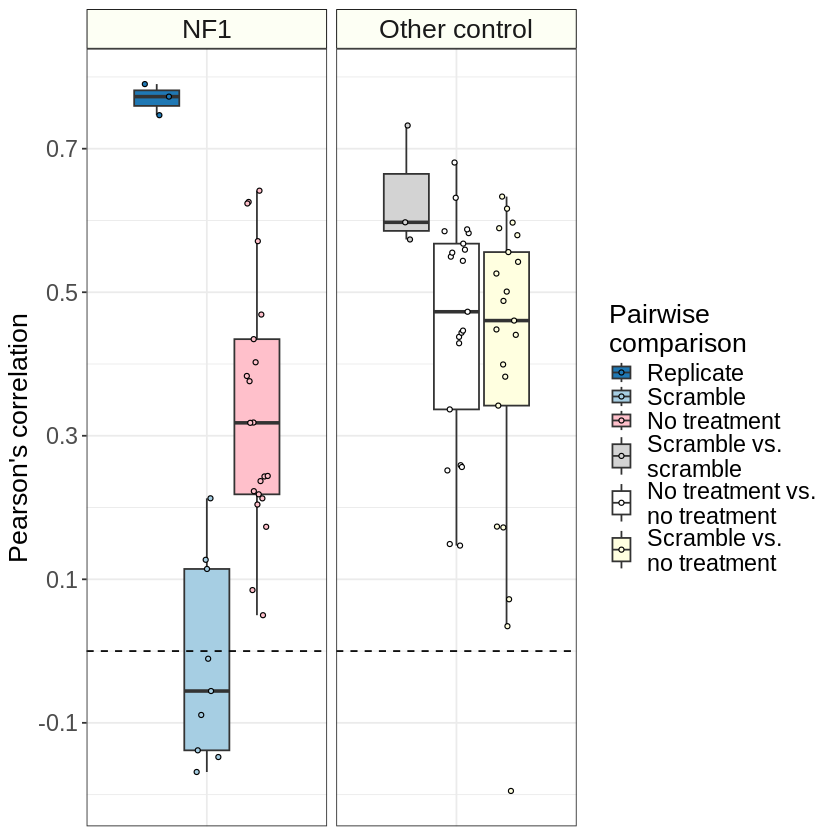

In [11]:
one_dose_construct_fig_gg <- (
    ggplot(one_dose_df,
           aes(
               x = construct_facet,
               y = correlation,
               fill = color_group
           )
          )
    + geom_boxplot(outlier.shape = NA)
    + geom_hline(yintercept = 0, linetype = "dashed")
    + geom_jitter(
        aes(color = color_group),
        position = position_jitterdodge(
            jitter.width = 0.5,
            dodge.width = 0.75
        ),
        size = 1.1,
        shape = 21,
        color = "black"
    )
    + facet_grid("~construct_facet", scales = "free_x")
    + labs(
        x = "siRNA concentration (uM)",
        y = "Pearson's correlation"
    )
    + scale_color_manual(
        name = "Pairwise\ncomparison",
        labels = construct_labels,
        values = construct_colors
    )
    + scale_fill_manual(
        name = "Pairwise\ncomparison",
        labels = construct_labels,
        values = construct_colors
    )
    + theme_bw()
    + figure_theme
    + theme(
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
    + scale_y_continuous(breaks = seq(-0.5, 0.8, by = 0.2))
)

one_dose_construct_fig_gg

## Panel C

In [12]:
plate_4_siRNA_probabilites_path <- file.path("../../2.evaluate_models/classify_genotypes/genotype_probabilities/plate_4_sirna_single_cell_probabilities.parquet")

siRNA_prob_df <- read_parquet(plate_4_siRNA_probabilites_path)

# Fill NA values in the Metadata_genotype column with "Null"
siRNA_prob_df <- siRNA_prob_df %>%
  mutate(Metadata_genotype = ifelse(is.na(Metadata_genotype), "NULL", Metadata_genotype))

dim(siRNA_prob_df)
head(siRNA_prob_df)

[1] 5656   22

probability_WT,Metadata_WellRow,Metadata_WellCol,Metadata_Well,Metadata_Site,Metadata_number_of_singlecells,Metadata_gene_name,Metadata_genotype,Metadata_seed_density,Metadata_siRNA,⋯,Metadata_Nuclei_Location_Center_X,Metadata_Nuclei_Location_Center_Y,Metadata_Cells_Location_Center_X,Metadata_Cells_Location_Center_Y,Metadata_ImageNumber,Metadata_Plate,Metadata_Cells_Number_Object_Number,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_Nuclei,Metadata_Nuclei_Number_Object_Number
<dbl>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.3939171,B,3,B3,10,133,NF1,WT,1000,Scramble,⋯,1015.3209,191.6607,1015.4590,168.2754,73,Plate_4,2,2,3,3
0.5595749,B,3,B3,10,133,NF1,WT,1000,Scramble,⋯,193.7133,249.4050,178.7552,311.3663,73,Plate_4,3,3,4,4
0.7772872,B,3,B3,10,133,NF1,WT,1000,Scramble,⋯,860.5986,263.7676,845.7826,229.1725,73,Plate_4,4,4,5,5
0.4643236,B,3,B3,10,133,NF1,WT,1000,Scramble,⋯,681.2961,350.3320,701.2009,388.1088,73,Plate_4,5,5,6,6
0.1838975,B,3,B3,10,133,NF1,WT,1000,Scramble,⋯,1027.3481,556.9676,993.9703,544.9722,73,Plate_4,6,6,7,7
0.8877939,B,3,B3,10,133,NF1,WT,1000,Scramble,⋯,750.7856,765.6096,744.7227,737.5544,73,Plate_4,7,7,8,8


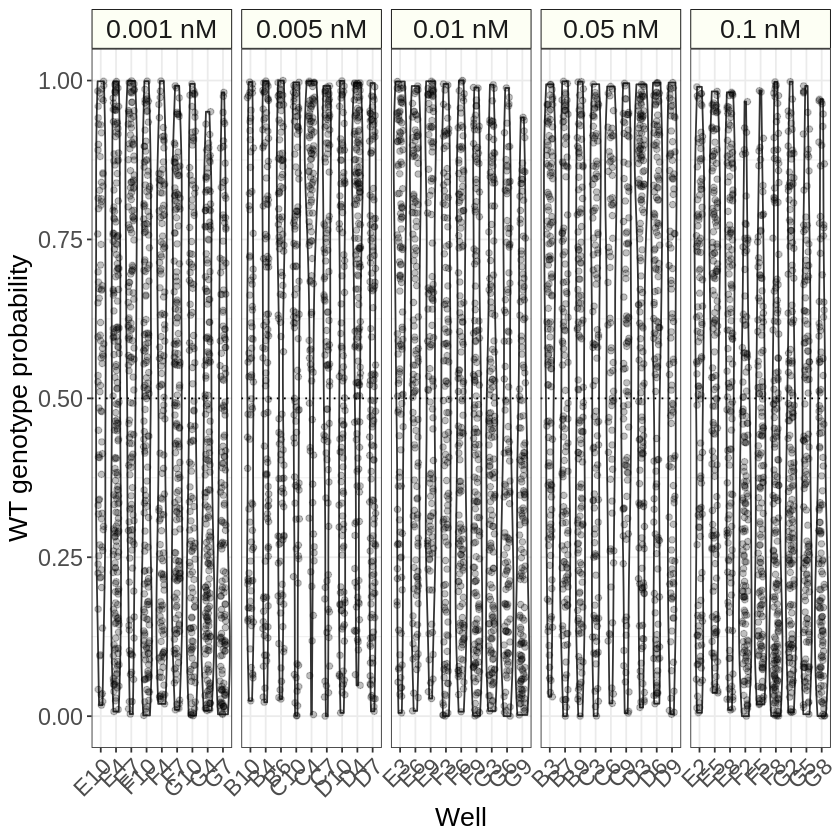

In [13]:
# Create a function to add "nM" to the end of each facet dose label
add_nM <- function(variable) {
  paste0(variable, " nM")
}

# Create the boxplot with facets and custom facet labels
box_per_well_plot <- ggplot(siRNA_prob_df, aes(x = factor(Metadata_Well), y = probability_WT)) +
  geom_violin() +
  geom_point(position = position_jitter(width = 0.2), size = 1.5, alpha = 0.25) +
  geom_hline(yintercept = 0.5, linetype = "dotted", color = "black", show.legend = FALSE) +  
  labs(x = "Well", y = "WT genotype probability") + 
  theme_bw() +
  facet_wrap(~ Metadata_Concentration, scales = "free_x", nrow=1, labeller = labeller(Metadata_Concentration = add_nM)) + 
  figure_theme +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

box_per_well_plot

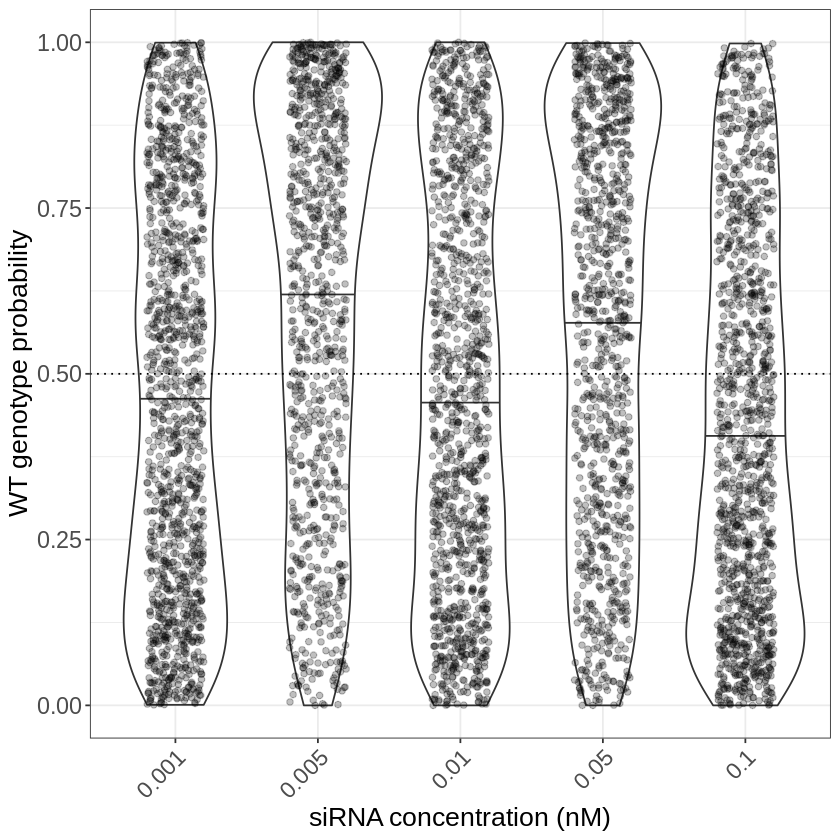

In [14]:
# Create the boxplot without facets and with concentration on the x-axis
box_plot <- ggplot(siRNA_prob_df, aes(x = factor(Metadata_Concentration), y = probability_WT)) +
  geom_violin(draw_quantiles = c(0.5)) +
  geom_point(position = position_jitter(width = 0.2), size = 1.5, alpha = 0.25) +
  geom_hline(yintercept = 0.5, linetype = "dotted", color = "black", show.legend = FALSE) +  
  labs(x = "siRNA concentration (nM)", y = "WT genotype probability") + 
  theme_bw() +
  figure_theme +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

box_plot

## Generate Figure 5

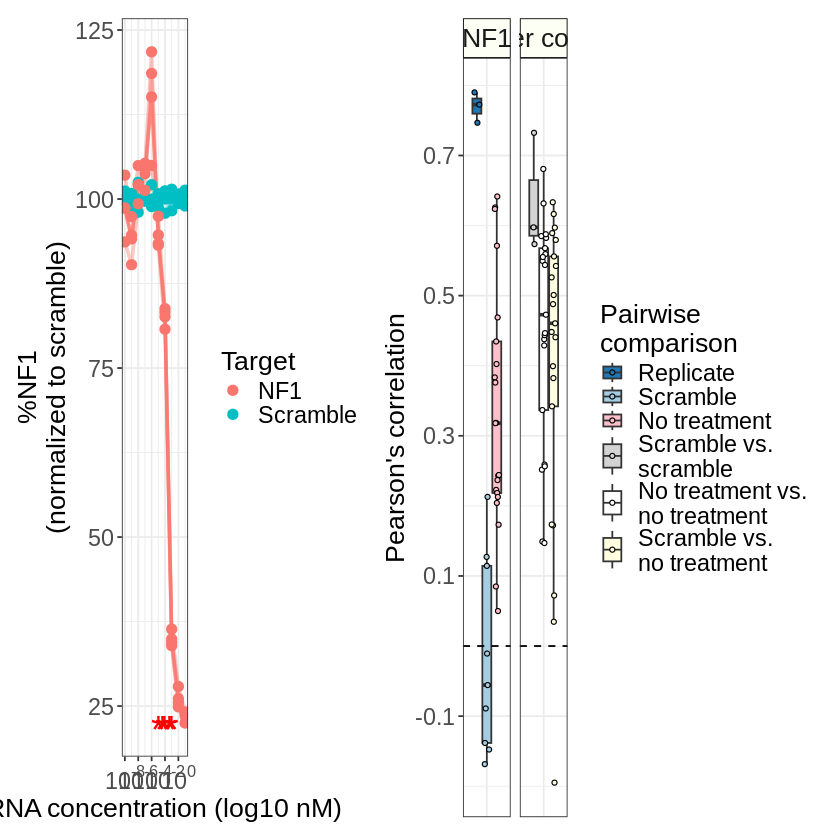

In [15]:
top_plot <- (
    free(titration_plot) |
    free(one_dose_construct_fig_gg)
) + plot_layout(widths = c(2,2.5))

top_plot

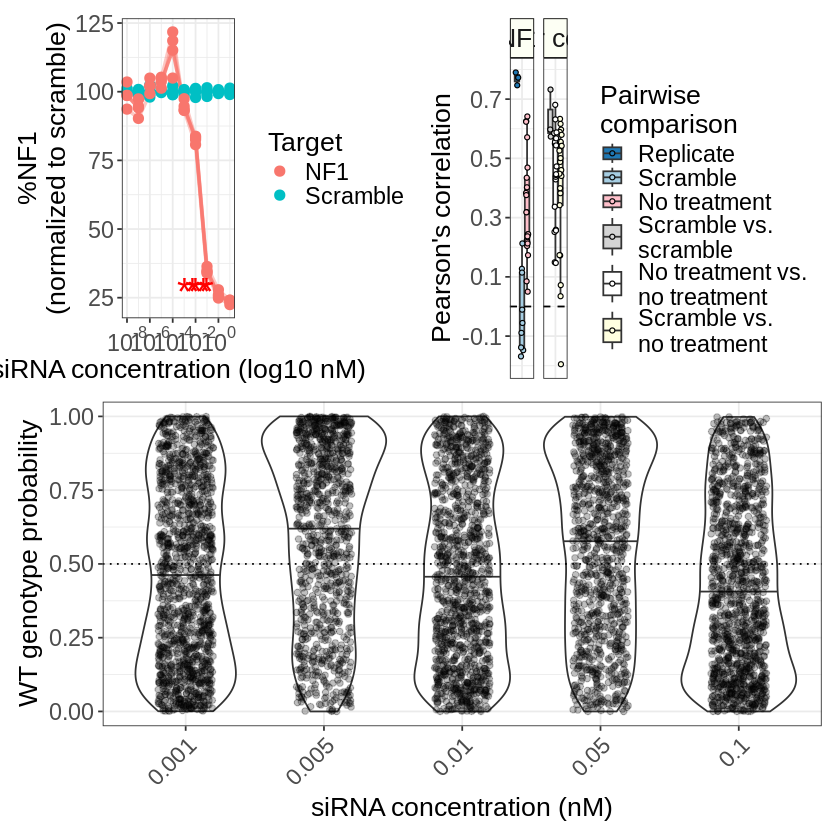

In [16]:
align_plot <- (
    top_plot /
    box_plot
) + plot_layout(heights = c(2.25,2))

align_plot

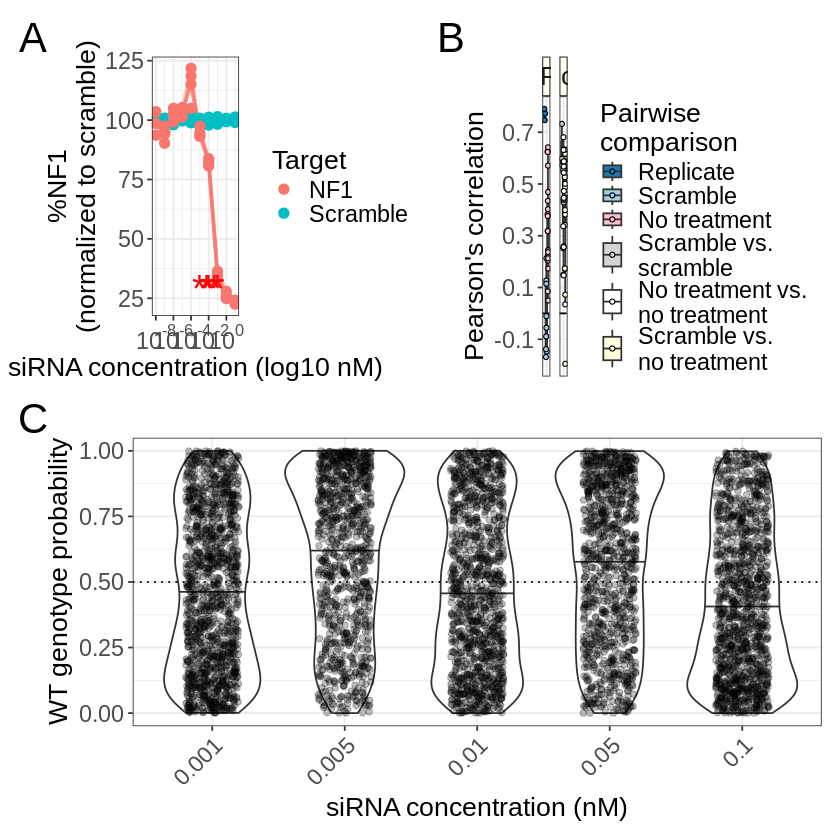

In [17]:
fig_5_gg <- (
  align_plot
) + plot_annotation(tag_levels = "A") & theme(plot.tag = element_text(size = 25))

# Save or display the plot
ggsave(output_main_figure_5, plot = fig_5_gg, dpi = 500, height = 10, width = 14)

fig_5_gg